# In this notebook, we show a regression example using the employee dataset. In this problem, the target variable is "salary_growth" that represents the amount of increase in an employee's salary. 

# The explanatory variables include age, edu, jobtime, prevexp, minority, gender, and jobcat. Definition of these explanatory variables is presented below. 


In [8]:
import pandas as pd
import numpy as np
import warnings
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from safeaipackage import check_accuracy, check_robustness, check_explainability, check_fairness, check_privacy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 10000)

In [2]:
data = pd.read_excel("D:/files/research_activities/ORGANIZED_FILES/safeaipackage/examples/employee.xlsx")
print("This dataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
data.head()

This dataset has 473 rows and 9 columns


,salary,age,edu,startsal,jobtime,prevexp,minority,gender,jobcat
0,57000,36,15,27000,98,144,no_min,m,manager
1,40200,30,16,18750,98,36,no_min,m,Clerical
2,21450,59,12,12000,98,381,no_min,f,Clerical
3,21900,41,8,13200,98,190,no_min,f,Clerical
4,45000,33,15,21000,98,138,no_min,m,Clerical


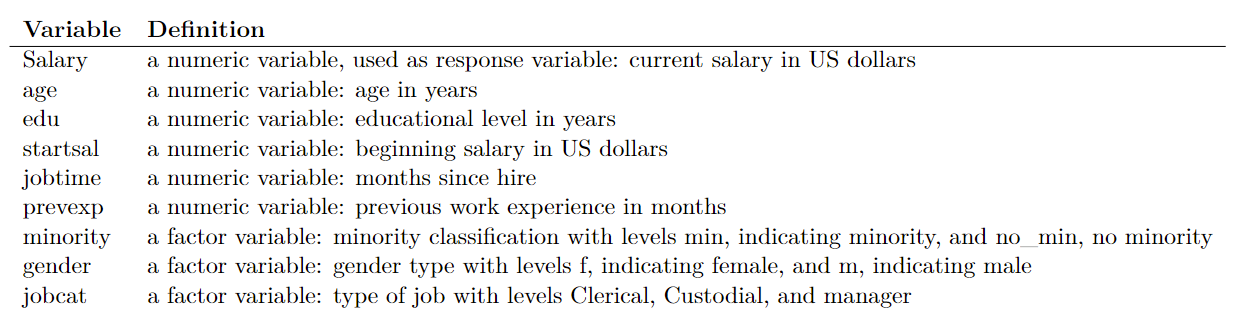

In [3]:
data["gender"] = np.where(data["gender"]=="m", 0, 1)
data["minority"] = np.where(data["minority"]=="no_min", 0, 1)
data = pd.get_dummies(data, columns=["jobcat"])
data.head()

,salary,age,edu,startsal,jobtime,prevexp,minority,gender,jobcat_Clerical,jobcat_Custodial,jobcat_manager
0,57000,36,15,27000,98,144,0,0,0,0,1
1,40200,30,16,18750,98,36,0,0,1,0,0
2,21450,59,12,12000,98,381,0,1,1,0,0
3,21900,41,8,13200,98,190,0,1,1,0,0
4,45000,33,15,21000,98,138,0,0,1,0,0


In [4]:
data["salary_growth"] = data["salary"]-data["startsal"]

data.drop(["salary", "startsal"], axis=1, inplace=True)
data.head()

,age,edu,jobtime,prevexp,minority,gender,jobcat_Clerical,jobcat_Custodial,jobcat_manager,salary_growth
0,36,15,98,144,0,0,0,0,1,30000
1,30,16,98,36,0,0,1,0,0,21450
2,59,12,98,381,0,1,1,0,0,9450
3,41,8,98,190,0,1,1,0,0,8700
4,33,15,98,138,0,0,1,0,0,24000


# Data analysis

In [5]:
data.describe()

,age,edu,jobtime,prevexp,minority,gender,jobcat_Clerical,jobcat_Custodial,jobcat_manager,salary_growth
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,31.672304,13.486258,81.141649,95.947146,0.219873,0.456660,0.765328,0.057082,0.177590,17409.196617
std,11.784093,2.885587,10.047505,104.680038,0.414599,0.498645,0.424243,0.232246,0.382572,10825.353367
min,17.000000,8.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5550.000000
25%,23.000000,12.000000,72.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10650.000000
50%,26.000000,12.000000,81.000000,55.000000,0.000000,0.000000,1.000000,0.000000,0.000000,14250.000000
75%,40.000000,15.000000,90.000000,139.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20020.000000
max,59.000000,21.000000,98.000000,476.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76240.000000


## Check for missing values

In [6]:
data.isna().sum()

age                 0
edu                 0
jobtime             0
prevexp             0
minority            0
gender              0
jobcat_Clerical     0
jobcat_Custodial    0
jobcat_manager      0
salary_growth       0
dtype: int64

## Distribution of the explanatory variables

<AxesSubplot: xlabel='age', ylabel='count'>

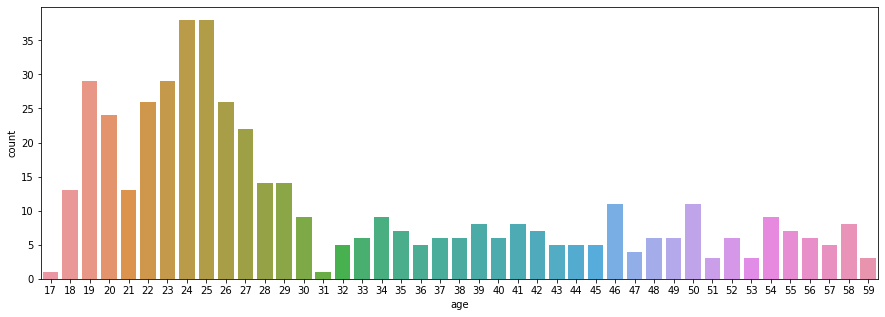

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(data["age"])

<AxesSubplot: xlabel='edu', ylabel='count'>

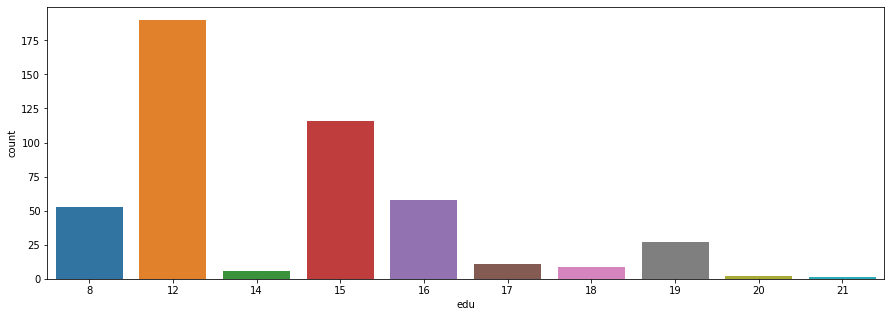

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data["edu"])

<AxesSubplot: xlabel='jobtime', ylabel='count'>

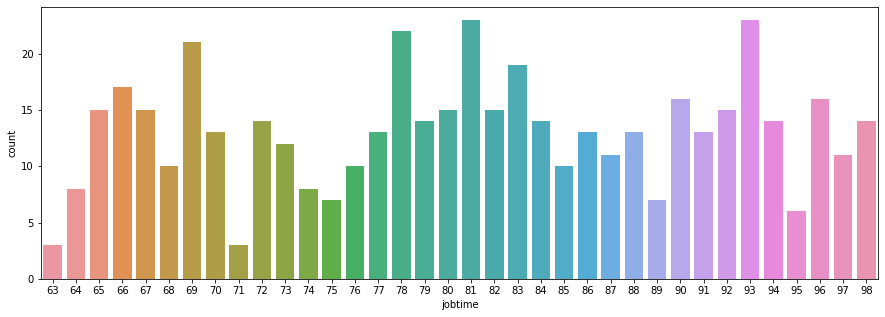

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data["jobtime"])

<AxesSubplot: ylabel='prevexp'>

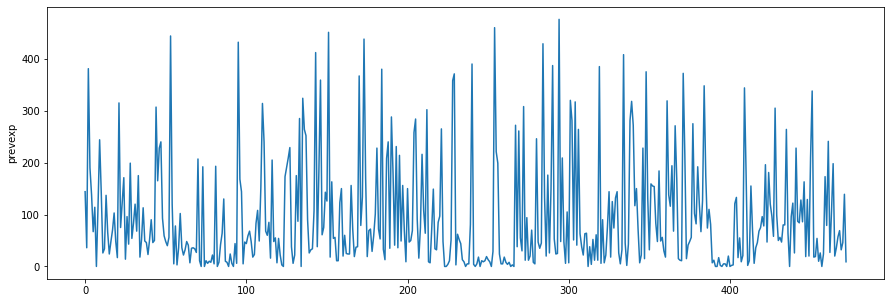

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data.index, y=data["prevexp"])

## Define X and y for the classification problem. We use 30% of data as the train data for a Random Forest model.

In [13]:
X = data.drop(["salary_growth"], axis=1)
y = data["salary_growth"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

print(xtrain.shape)

(331, 9)


In [14]:
rf_regressor = RandomForestRegressor(random_state=1).fit(xtrain, ytrain)
yhat = rf_regressor.predict(xtest)

# ACCURACY

## To check accuracy of the classification model, we can use the rga function defined in the "check_accuracy" module of "safeaipackage" python package

In [15]:
#ACCURACY
rga = check_accuracy.rga(ytest, yhat)
rga

0.9149516963330642

#### The higher RGA value (closer to one) the better concordance between the trained model and the actual values

## "check_accuracy" module includes the rga_statistic_test function that is an RGA based test for comparing the predictive accuracy of a reduced model with that of a more complex model. In the following cell, we do the test for "minority"

In [16]:
xtrain_rm = xtrain.drop("minority", axis=1)
xtest_rm = xtest.drop("minority", axis=1)
model_minority = RandomForestRegressor(random_state=1).fit(xtrain_rm, ytrain)
yhat_minority = model_minority.predict(xtest_rm)
check_accuracy.rga_statistic_test(ytest, yhat_minority, yhat)

0.03637343872427377

### p_value is smaller than our considered significance level, 5% meaning that the null hypothesis is rejected indicating that the reduced model has almost the same predictive accuracy as the full model.

# EXPLAINABILITY

## To find the contribution of explanatory variables to the output of the model, we can use the rge function defined in the "check_explainability" module 

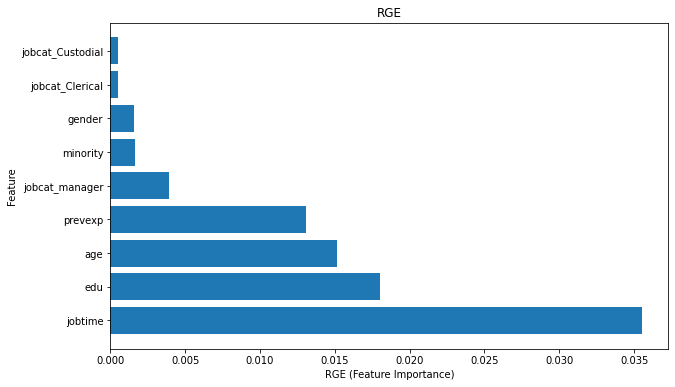

,RGE
jobtime,0.035521
edu,0.018036
age,0.015171
prevexp,0.013059
jobcat_manager,0.003906
minority,0.001639
gender,0.001571
jobcat_Clerical,0.000494
jobcat_Custodial,0.000481


In [17]:
check_explainability.rge(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1))

## "jobtime" has the highest contribution with a contribution value equal to 0.035521. This means that adding "jobtime" to the model contributes to an increase of 0.035521 in the predictive accuracy.

## Here we apply the RGE based statistical test for "jobtime". Therefore, this variable is removed from the model to find the yhat_rm for the test function.

# RGE test

In [18]:
xtrain_jobtime = xtrain.drop("jobtime", axis=1)
xtest_jobtime = xtest.drop("jobtime", axis=1)

rf_model_jobtime = RandomForestRegressor(random_state=1).fit(xtrain_jobtime, ytrain)
yhat_jobtime = rf_model_jobtime.predict(xtest_jobtime)

In [19]:
check_explainability.rge_statistic_test(yhat, yhat_jobtime)

1.708275976442496e-08

## The p_value is smaller than 5% so we can reject the null hypothesis indicating the eqaulity of the ranks of predictions of the model including the variable, "jobtime" and excluding "jobtime". This means that adding jobtime is valuable.

# ROBUSTNESS

## Using the rgr_single function and selecting a variable, we can find the robustness of the model regarding the perturbations of the selected variable.

In [20]:
check_robustness.rgr_single(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1), "prevexp", perturbation_percentage=0.25)

0.978690091795611

## There is also rgr_all which perturbs all the variables simultaneously.

In [21]:
check_robustness.rgr_all(xtrain, xtest, ytrain, ytest, RandomForestRegressor(random_state=1), perturbation_percentage=0.25)

0.4697234905773624

## RGR test

## To do the RGR based test, we need to have another model to compare the predictions of this model with our base model. For this purpose, in this example, we utilize a  linear regression. Moreover, to do this test, we need to perturb the variable of interest. "check_robustness" module provides a function named "perturb" that follows the same perturbartion process as the rgr_single and rgr_all functions. Here, we consider "age" and apply the test as follows:

In [24]:
regression_model = LinearRegression().fit(xtrain,ytrain)
yhat_reg = regression_model.predict(xtest)

# perturb "age" then find yhat_pert of the two models
perturbed_xtrain = check_robustness.perturb(xtrain, "age")
# perturbed Random Forest
rf_model_pert = RandomForestRegressor(random_state=1).fit(perturbed_xtrain, ytrain)
yhat_rf_pert = rf_model_pert.predict(xtest)
# perturbed Linear Regression
lr_model_pert = LinearRegression().fit(perturbed_xtrain, ytrain)
yhat_lr_pert = lr_model_pert.predict(xtest)

In [25]:
check_robustness.rgr_statistic_test(yhat, yhat_reg, yhat_rf_pert, yhat_lr_pert)

0.12770868076878922

# FAIRNESS

## Fairness of a model can be measured using the rgf function in the "check_fairness" module

In [25]:
check_fairness.rgf(xtrain, xtest, ytrain, ytest, ["gender", "minority"], RandomForestRegressor(random_state=1))

,RGF
gender,0.998429
minority,0.998361


# RGF test

## In the following cell, we do the RGF based test for "gender"

In [26]:
xtrain_gender = xtrain.drop("gender", axis=1)
xtest_gender = xtest.drop("gender", axis=1)

rf_model_gender = RandomForestRegressor(random_state=1).fit(xtrain_gender, ytrain)
yhat_gender = rf_model_gender.predict(xtest_gender)

In [27]:
check_fairness.rgf_statistic_test(yhat, yhat_gender)

0.003146313784039523

# PRIVACY

## Using the rgp function in "check_privacy" module, we check privacy of each observation used in the model. Here we find the RGP metric for the 10th and 12th observations:

In [28]:
check_privacy.rgp(xtrain, xtest, ytrain, ytest, [10,12],RandomForestRegressor(random_state=1))

,RGP
10,0.004057
12,0.003356


# RGP test

## The RGP test can be done for the 12th observation like below:

In [29]:
xtrain_12 = xtrain.drop(12, axis=0)
ytrain_12 = ytrain.drop(12, axis=0)

rf_model_12 = RandomForestRegressor(random_state=1).fit(xtrain_12, ytrain_12)
yhat_12 = rf_model_12.predict(xtest)

In [30]:
check_privacy.rgp_statistic_test(yhat, yhat_12)

1.6581279400400763e-08